In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/data-analysis-software')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

from readTrc_4CH import Trc
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd
from Ltif import Lpicday, Lpic

In [198]:
#date = '22_11_12'
date = '22_11_13'

files = [val for val in os.listdir('/eos/experiment/gbar/pgunpc/data/' + date) if (val[0] != '.' and val[-3:] == 'txt' and val[:2] == 'WF')]
files = ['/eos/experiment/gbar/pgunpc/data/' + date + '/' + val for val in files]

tfiles = [val for val in os.listdir('/eos/experiment/gbar/pgunpc/data/' + date) if (val[0] != '.' and val[-3:] == 'tif')]
tfiles = ['/eos/experiment/gbar/pgunpc/data/' + date + '/' + val for val in tfiles]

In [188]:
day = Lpicday(date)
data = day.clusters_day(min_size = 60)

100%|██████████| 675/675 [01:20<00:00,  8.40it/s]


In [195]:
len(files), len(tfiles)

(669, 675)

In [231]:
files[8], tfiles[14] 

('/eos/experiment/gbar/pgunpc/data/22_11_13/WF.1668295914.592.txt',
 '/eos/experiment/gbar/pgunpc/data/22_11_13/PCO-SwY_exp_1_us_1668295914.721.tif')

In [ ]:
#interesting: 31

/eos/experiment/gbar/pgunpc/data/22_11_13/WF.1668297066.562.txt
13/11/2022  00:51:06.561734


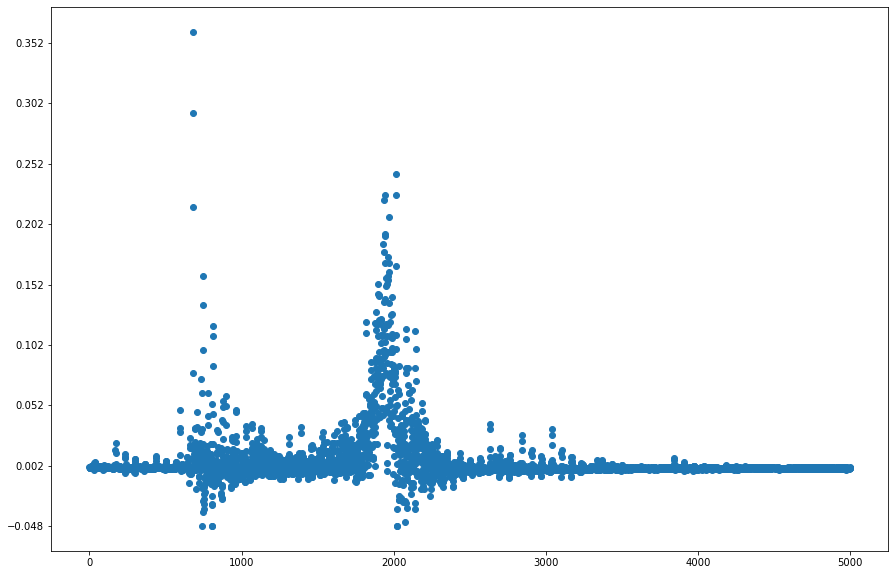

In [285]:
i = 18
a = pd.read_csv(files[i], delimiter = '\t', skiprows = [1,2,3,4])#, index_col = [0])
print(files[i])

plt.figure(figsize = (15,10))
y = np.array(a['[2]'])
x = np.arange(0,len(y),1)
plt.scatter(x, y)
plt.yticks(np.arange(min(y), max(y), 0.05))
print(a['waveform'][0])

/eos/experiment/gbar/pgunpc/data/22_11_13/PCO-SwY_exp_1_us_1668297066.672.tif


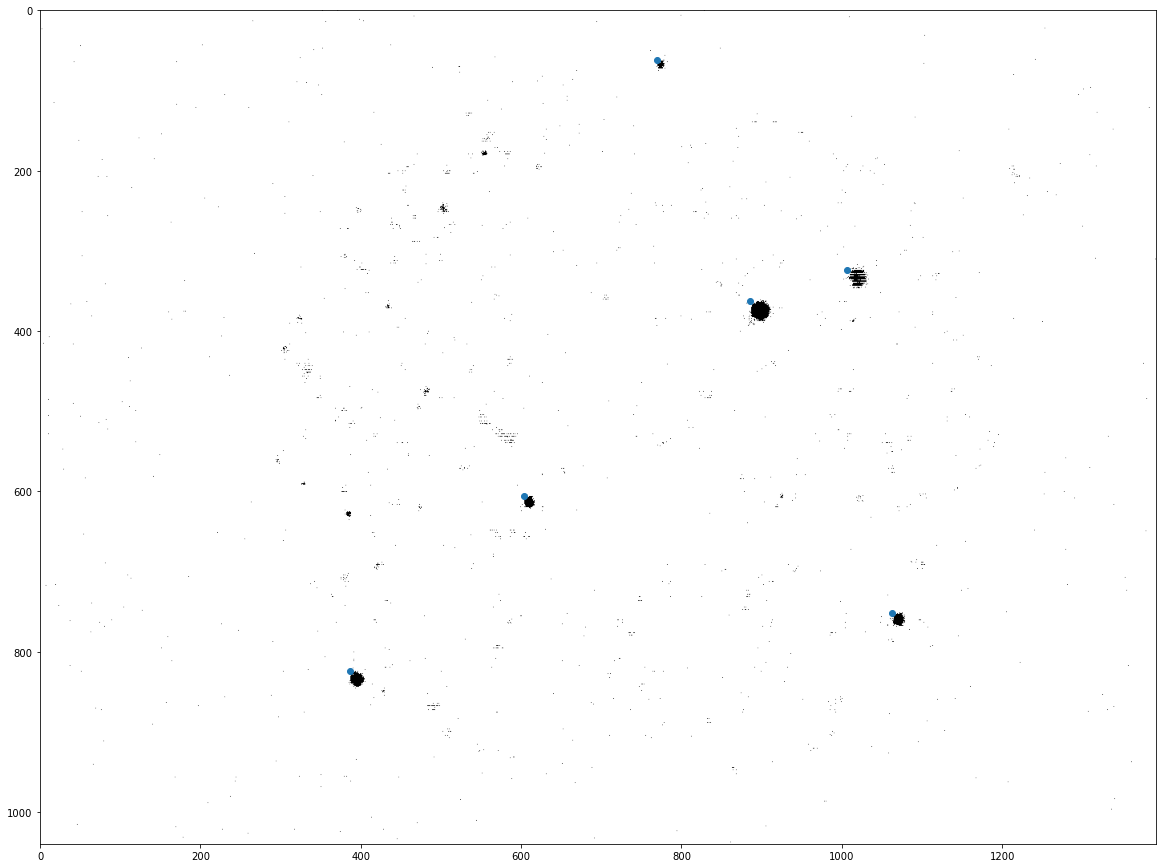

In [286]:
time = int(files[i][-18:-8])
loc = -1
for k in range(len(tfiles)):
    ttime = int(tfiles[k][-18:-8])
    if abs(ttime - time) <= 6:
        loc = k

Im = Image.open(tfiles[loc])
print(tfiles[loc])
arr = np.array(Im)
arr[arr < np.average(arr) + 3*np.std(arr)] = 0
arr[arr != 0] = 100
plt.figure(figsize = (20,20))
plt.imshow(arr, cmap = 'Grays')
plt.scatter([val[1] for val in data['pos'][loc]], [val[0] for val in data['pos'][loc]])

In [287]:
data['sum'][loc], data['size'][loc], [val/bal for val,bal in zip(data['sum'][loc],data['size'][loc])]

([67212, 347404, 545888, 159424, 204660, 254140],
 [72, 303, 469, 152, 188, 251],
 [933.5,
  1146.5478547854786,
  1163.9402985074628,
  1048.842105263158,
  1088.6170212765958,
  1012.5099601593625])

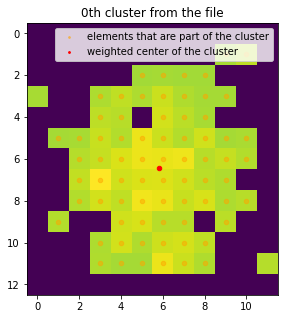

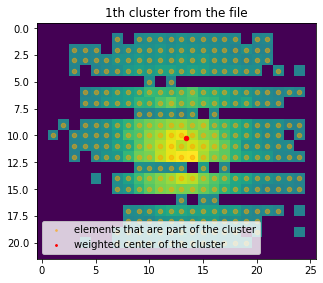

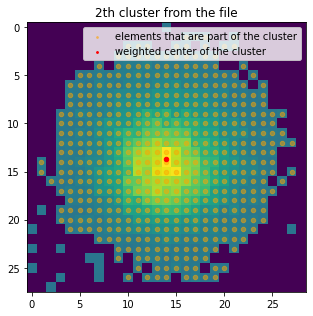

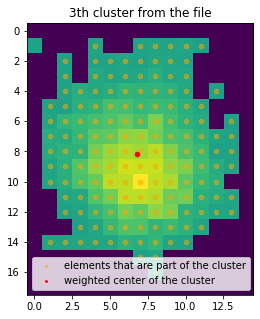

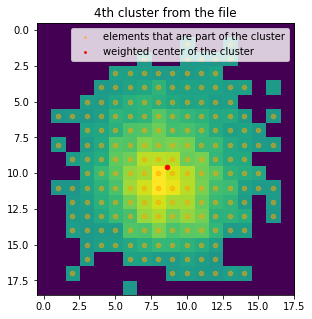

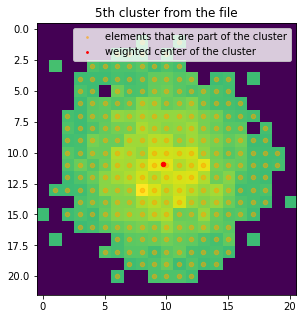

In [288]:
Lpic(tfiles[loc]).show_clust(min_size = 60)

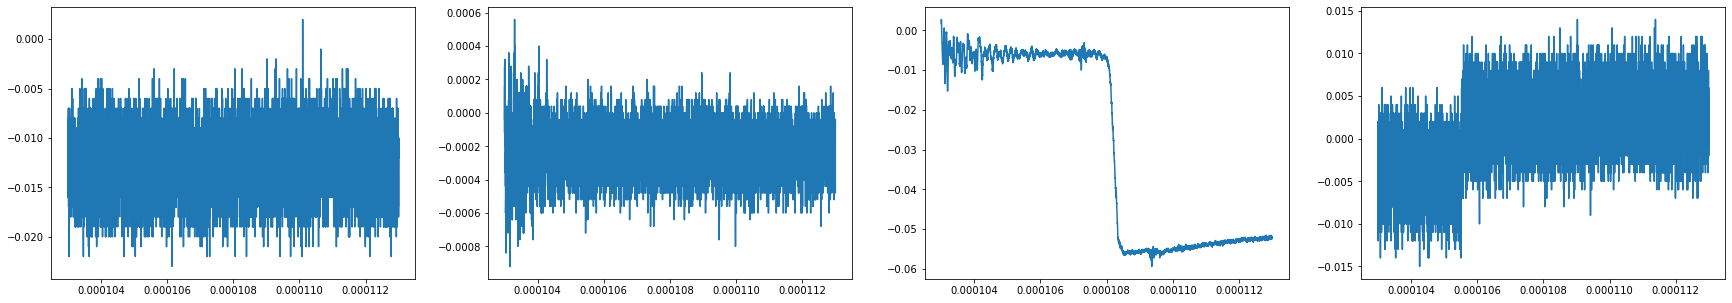

In [6]:
data = Trc().open(files[0])
time = data[0]
vol = data[1]

_,axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))

for ax, y in zip(axes, vol):
    ax.plot(time[0],y)

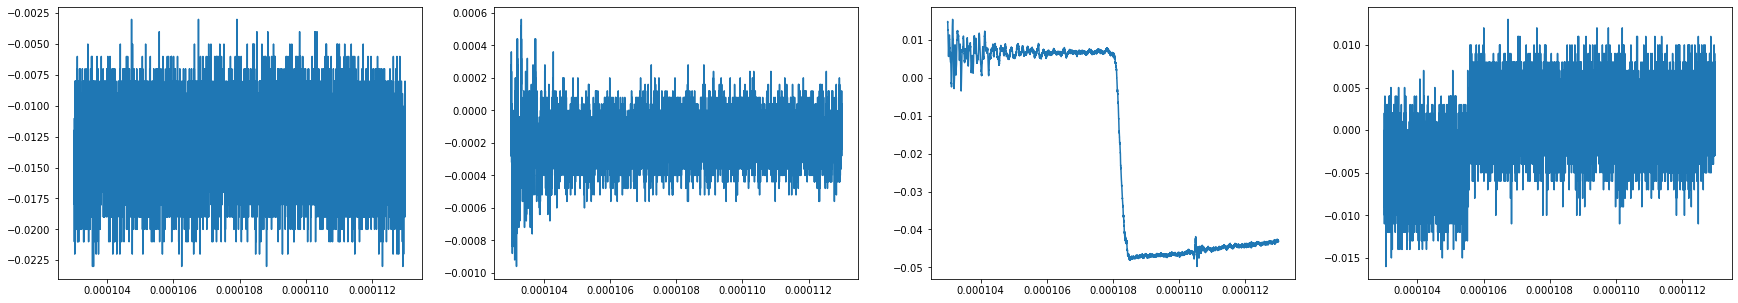

In [7]:
data = Trc().open(files[1])
time = data[0]
vol = data[1]

_,axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))

for ax, y in zip(axes, vol):
    ax.plot(time[0],y)

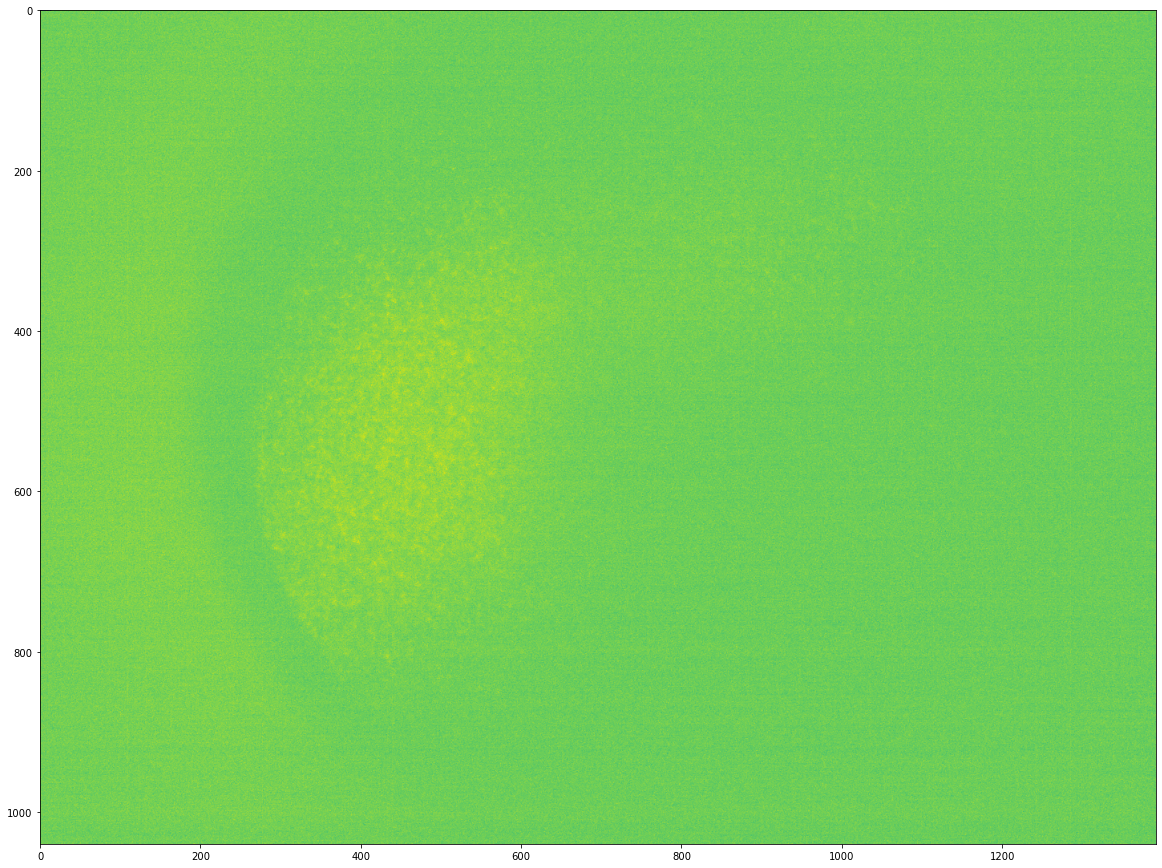

In [29]:
Im = Image.open(files[0])
arr = np.array(Im)
#arr[arr < np.average(arr) + 3*np.std(arr)] = 0
plt.figure(figsize = (20,20))
plt.imshow(arr)

In [120]:
y[0]

0.0003000041

In [123]:
min(y), max(y), np.arange(min(y), max(y), 0.05)

(-0.04729999,
 0.2051,
 array([-0.04729999,  0.00270001,  0.05270001,  0.10270001,  0.15270001,
         0.20270001]))

In [ ]:
target = np.array([1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
                  1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,])